In [1]:
%matplotlib inline
import pandas as pd
import random
import re
from IPython.display import clear_output
import itertools
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
train1M = pd.read_csv('train1M.csv')

In [3]:
train1M.head()

,Unnamed: 0,label,integer_1,integer_2,integer_3,integer_4,integer_5,integer_6,integer_7,integer_8,...,categorical_18,categorical_19,categorical_20,categorical_21,categorical_22,categorical_23,categorical_24,categorical_25,categorical_26,Index
0,19,0,7.0,102,NaN,3.0,780.0,15.0,7.0,15.0,...,5edd90de,NaN,NaN,e12ce348,NaN,c3dc6cef,49045073,NaN,NaN,19
1,135,0,NaN,0,17.0,3.0,19811.0,NaN,0.0,3.0,...,b04e4670,21ddcdc9,5840adea,60f6221e,NaN,32c7478e,43f13e8b,ea9a246c,731c3655,135
2,177,0,NaN,1,5.0,4.0,2931.0,36.0,2.0,6.0,...,0f4a15b0,NaN,NaN,0014c32a,NaN,3a171ecb,3b183c5c,NaN,NaN,177
3,250,0,NaN,0,NaN,0.0,40698.0,963.0,0.0,2.0,...,281769c2,NaN,NaN,d4703ebd,NaN,32c7478e,aee52b6f,NaN,NaN,250
4,329,1,NaN,23,83.0,2.0,NaN,NaN,0.0,2.0,...,f54016b9,21ddcdc9,5840adea,ff3ce4c0,c9d4222a,be7c41b4,d691765a,e8b83407,d1d45fc5,329


2.2 Histograms and Stats

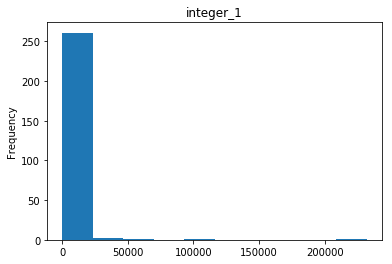

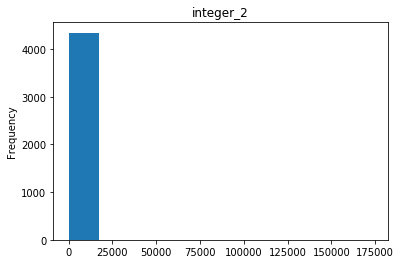

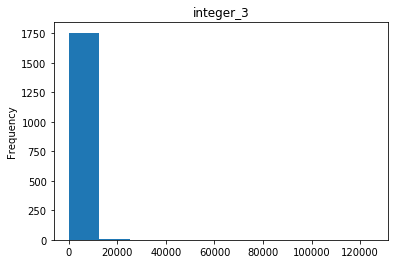

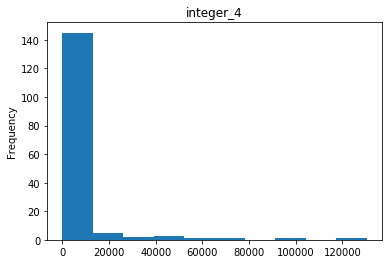

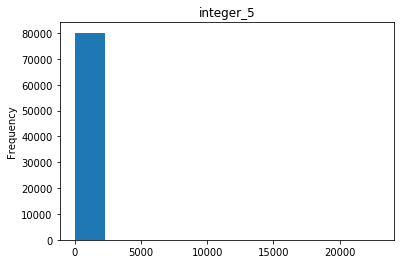

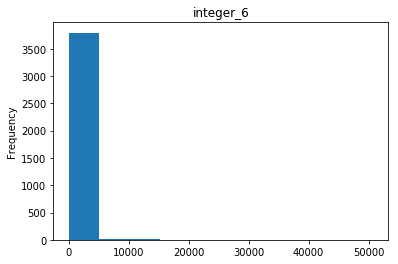

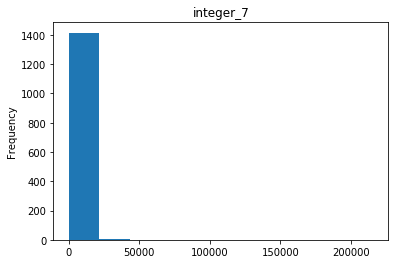

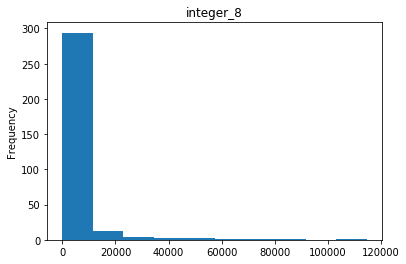

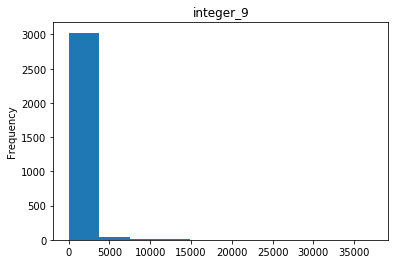

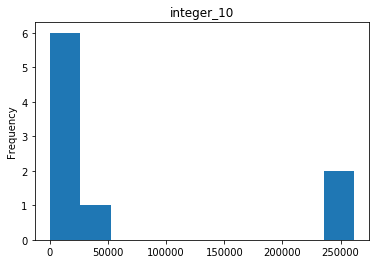

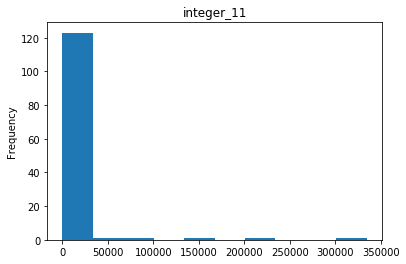

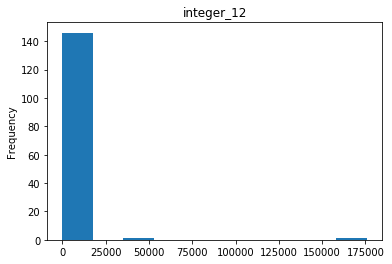

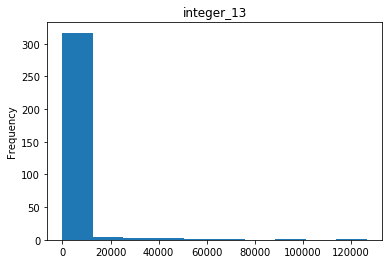

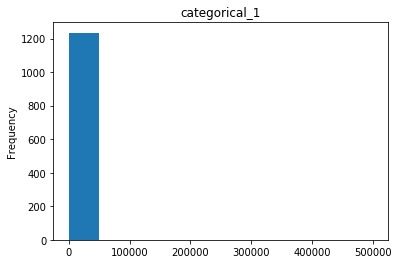

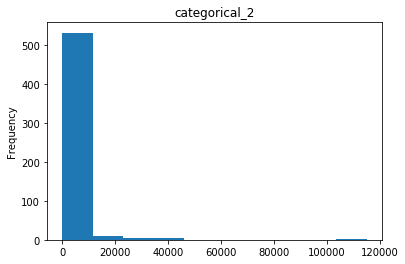

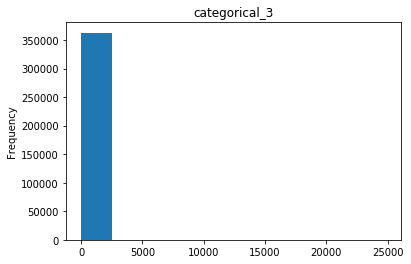

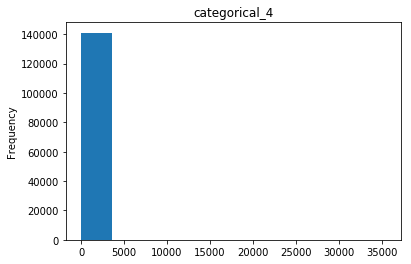

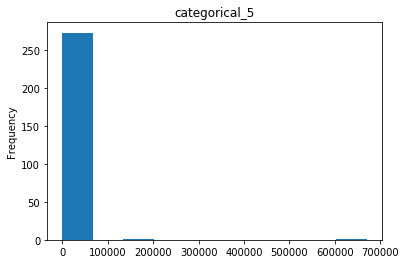

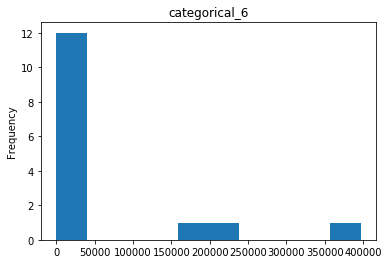

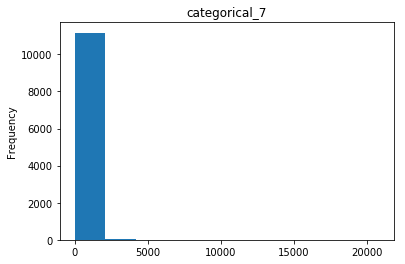

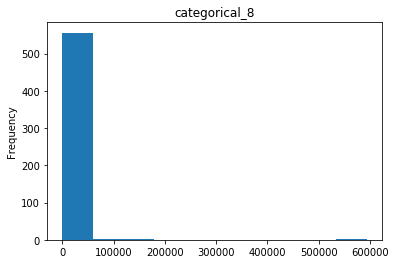

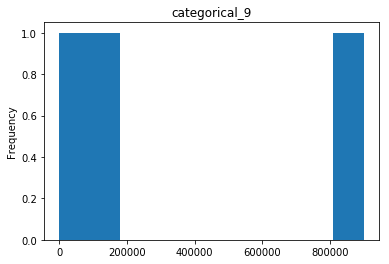

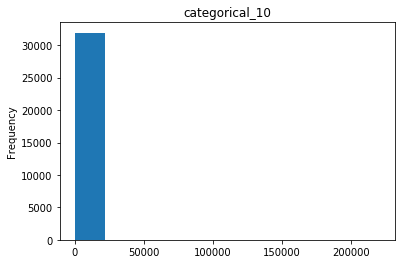

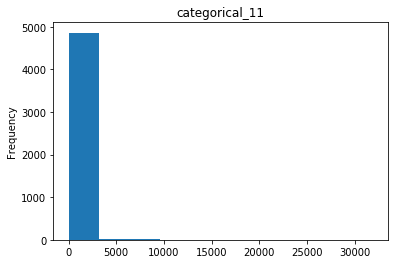

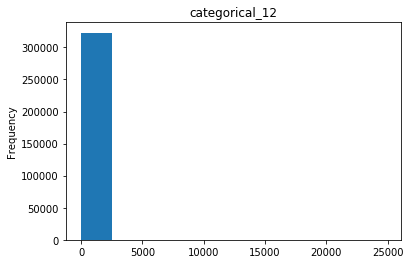

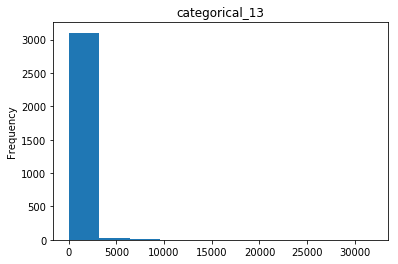

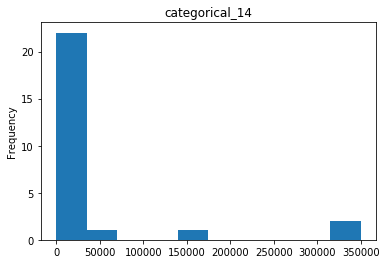

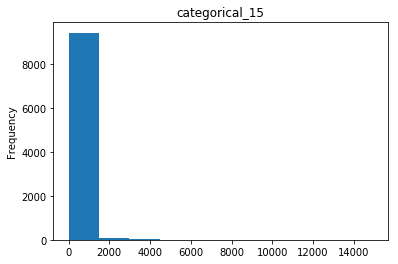

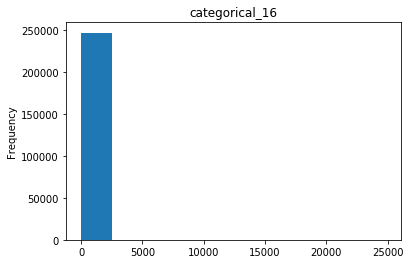

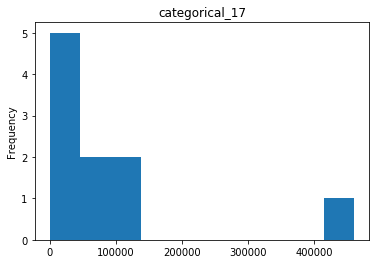

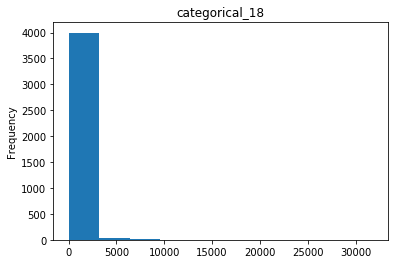

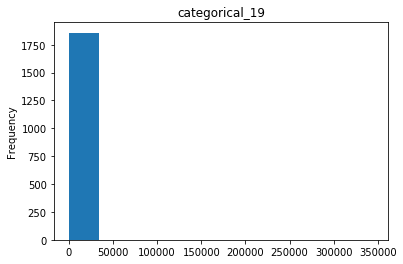

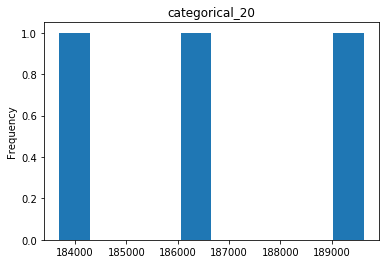

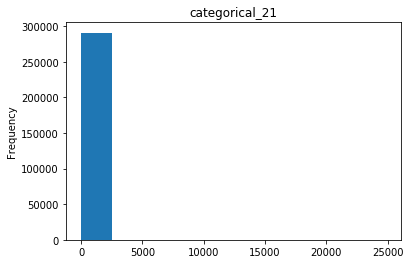

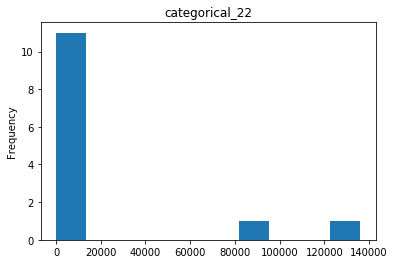

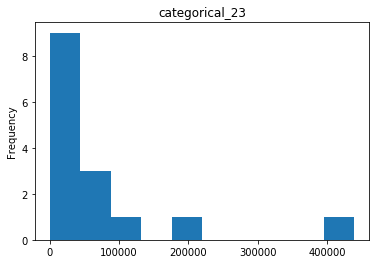

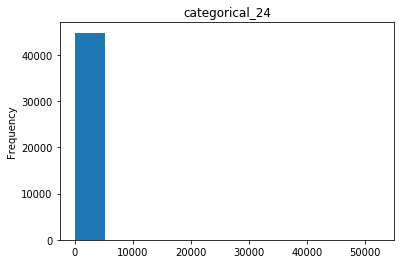

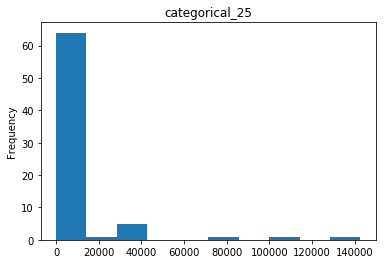

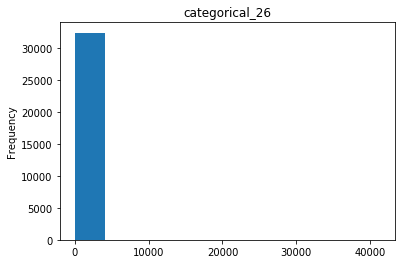

,integer_1,integer_2,integer_3,integer_4,integer_5,integer_6,integer_7,integer_8,integer_9,integer_10,integer_11,integer_12,integer_13
count,547351.000000,1000000.000000,785154.000000,782791.000000,974533.000000,777146.000000,956983.000000,999512.000000,956983.000000,547351.000000,956983.000000,235572.000000,782791.000000
mean,3.506584,106.377807,27.065321,7.315527,18641.830275,115.039034,16.442098,12.512986,106.179319,0.616889,2.732943,0.988131,8.199752
std,9.752981,392.962915,402.800192,8.781313,70027.837172,315.677901,77.506505,16.608903,220.433666,0.683757,5.195889,4.929478,15.480945
min,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,2.000000,325.000000,8.000000,1.000000,2.000000,10.000000,0.000000,1.000000,0.000000,2.000000


In [8]:
SummaryStats = pd.DataFrame()
for col in train1M.columns:
    if (col != 'label' and col != 'Index' and col != 'Unnamed: 0'):

        train1M[col].value_counts().plot(kind='hist',title=col)
        plt.show()
        plt.savefig(col)
        if (train1M[col].dtype != 'O'):
            SummaryStats[col] = train1M[col].describe()
        
        
SummaryStats.head()

2.3 Normalization and Feature Engineering